In [36]:
# --- Libraries with a short description ---
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for plotting
import numpy as np #for numeric calculations and making simulated data.
import seaborn as sns # for plotting, an extension on matplotlib

# - sklearn has many data analysis utility functions like scaling as well as a large variety of modeling tools.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE

# This forces plots to be shown inline in the notebook
%matplotlib inline

##  <font color = dimgrey> 1. Introduction to the dataset </font>

The dataset in this exercice contains comprehensive health information from  hospital patients with and without cardiovascular disease. The target variable "cardio," reflects the presence or absence of the disease, which is characterized by a buildup of fatty deposits inside the arteries (blood vessels) of the heart.

 -------
As is often the case with data analysis projects, the features/variables have been retrieved from different sources:
- doctors notes (texts)
- examination variables that have come from a database containing lab results or taken during a doctors examination
- self reported variables

--------------
The exercise data has the following columns/attributes:

| Feature | Type | Explanation |
| :- | :- | :-
| age | numeric | The age of the patient in days
| gender | binary | Male/Female
| body_mass | numeric | Measured weight of the patient (cm)
| height | numeric | Measured weight of the patient (kg)
| blood_pressure_high | numeric | Measured Systolic blood pressure
| blood_pressure_low | numeric | Measured Diastolic blood pressure
| smoke | binary | A subjective feature based on asking the patient whether or not he/she smokes
| active | binary |  A subjective feature based on asking the patient whether or not he/she exercises regularly
| serum_lipid_level | categorical | Serum lipid / Cholesterol associated risk information evaluated by a doctor
|family_history| binary | Indicator for the presence of family history of cardiovascular disease based on medical records of patients
| cardio | binary | Whether or not the patient has been diagnosed with cardiac disease.

-----------
#### ***Reading data***

It is good practice to read the features in using their correct types instead of fixing them later. Below, there is ready-made code for you to read in the data, using the data types and column names listed in the above table. Don't change the name of the variable, _data_. It is important in later exercises (for example in ex. 5e) that this is the name of the variable. <font color = red> If you have the dataset in the same folder as this notebook, the path already given to you should work. </font>

---------------

In [37]:
 # --- READ IN DATA (no need to change) --------
data_path = "CardioCare_ex1.csv" #if you just give the name of the file it will look for the data in the same folder as your script
data = pd.read_csv(data_path, dtype = {'age': 'int', 'height': 'int', 'body_mass':'int', 'blood_pressure_low':'int', 'blood_pressure_high':'int', 'gender': 'boolean', 'smoke': 'boolean',
       'active':'boolean', 'cardio':'boolean', 'serum_lipid_level':'category', 'family_history':'boolean'}) #the main data you use in this exercise should have this variable name, so that code given for you further on will run.


---------
***Exercise 1 a)***
1. First, print out the first five rows of the data.

2. Then, save the feature names to lists by their types: make three lists named **numeric_features**, **binary_features** and **categorical_features**, containing the **names** of the features of each corresponding type (*you can think in terms of this exercise that binary variables can also be called booleans*).

_When working with DataFrames, it can be incredibly helpful to organize column names into a list or lists. This organization simplifies data manipulation and analysis, and can be used to easily select, filter, or perform operations on specific sets of columns, it also prevents typing errors and avoids repetition!_

_For example, you can access all columns in you DataFrame with numeric features using the data[numeric_features] notation_


In [38]:
# --- Your code here for 1 a) ---
# print first 5 rows
print(data.head())

numeric_features = data.select_dtypes(include=['int']).columns.tolist()
binary_features = data.select_dtypes(include=['bool']).columns.tolist()
categorical_features = data.select_dtypes(include=['category']).columns.tolist()

print("Numeric features:", numeric_features)
print("Binary features:", binary_features)
print("Categorical features:", categorical_features)

     age  gender  height  body_mass  blood_pressure_high  blood_pressure_low  \
0  19797   False     161         55                  102                  68   
1  22571    True     178         68                  120                  70   
2  16621    True     169         69                  120                  80   
3  16688   False     156         77                  120                  80   
4  19498    True     170         98                  130                  80   

   smoke  active  cardio serum_lipid_level  family_history  
0  False    True   False          elevated           False  
1  False   False   False            normal           False  
2  False    True   False            normal           False  
3  False    True   False            normal           False  
4   True    True    True          elevated           False  
Numeric features: ['age', 'height', 'body_mass', 'blood_pressure_high', 'blood_pressure_low']
Binary features: ['gender', 'smoke', 'active', 'cardio', 'f

_________
## <font color = dimgrey> 2. Checking data quality
    
Often in data analysis projects the data has not been gathered exclusively for the data analysis only but originally for other reasons. Because of this, the features are most often not nicely formatted and may have mistakes. It might be tempting to just use the data as is with a model, but it is very important to first check the data for possible mistakes as they can make all the conclusions you make based on your analysis misleading. One good routine for checking data quality is to first calculate statistical descriptives and then to plot the features to check if the values are realistic.

  
-----------    
    
Some descriptive statistics don't really make sense for certain kinds of features. In pandas, like in many other packages, some functions work differently depending on the data type of a column. In the following exercise we will look at the data descriptive statistics as well as how the behavior can change when the data types are different.

----------
***2 a)***  Print out the data types of your dataset below.

_Perhaps the most common data types in pandas (see https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes) are **float**, **int**, **bool** and **category**._

In [39]:
# --- 2 a) Print the feature types of your dataset --- #
# print data types for every variable to see what are there in data
print(data.dtypes)

age                       int32
gender                  boolean
height                    int32
body_mass                 int32
blood_pressure_high       int32
blood_pressure_low        int32
smoke                   boolean
active                  boolean
cardio                  boolean
serum_lipid_level      category
family_history          boolean
dtype: object


--------
***2 b)*** Use the **DataFrame.describe() method** in the cell below on your data.   


In [40]:
# --- Your code for 2 b) --- #
data.describe()

,age,height,body_mass,blood_pressure_high,blood_pressure_low
count,210.000000,210.000000,210.000000,210.000000,210.000000
mean,19455.504762,164.180952,73.895238,127.857143,81.814286
std,2429.010199,7.534648,14.612326,17.508947,9.947652
min,14367.000000,142.000000,45.000000,90.000000,50.000000
25%,17635.750000,158.000000,64.000000,120.000000,80.000000
50%,19778.000000,164.000000,70.000000,120.000000,80.000000
75%,21230.500000,170.000000,81.000000,140.000000,90.000000
max,23565.000000,195.000000,125.000000,190.000000,120.000000


--------
***2 c)*** Did you get all of the features statistics or not? What do you think happened?


<font color="green">The describe method by default provides the statistics of central tendency.Like count, mean, std, min, max,percentiles like 25, 50 and 75  for the numerical data columns only. The statistical measures are possible only for numerical data. However, It doesnot give all statistics because certain statistical measures do not make sense for non-numeric data like categorical variable's data. like variance, skewness and many more. it also don't provide any hypothesis tests.it gives descriptive statistics mostly))</font>

----------
***2 d)*** Calculate descriptives for the binary (boolean) features and the categorical feature <br>

_tip: in python, same type data structures can in many cases be concatenated using the + operator. If youre using the lists of names you created to subset, you can concatenate the two lists of feature names and use the resulting list to help you subset the dataframe_

In [41]:
# 2 d) Your code here #

# concatenating binary and categorical variable
nonNumeric_features = binary_features + categorical_features

# descriptions of binary and categorical feature provides measure of frequency
data[nonNumeric_features].describe()



,gender,smoke,active,cardio,family_history,serum_lipid_level
count,210,210,210,210,210,210
unique,2,2,2,2,2,4
top,False,False,True,False,False,normal
freq,129,186,162,105,128,153


----------
Now, we will see ***what would have happened if the data was read in using default settings*** and not giving information about the types of the features (dtypes), giving no arguments to pd.read_csv.

Run the below cell (no need to modify the code) and look at the output of the cell with the wrongly read data. Compare it with the output of the cell where you used the correctly read data to get the descriptives.

In [42]:
# read in the dataset with no arguments
wrongly_read_data = pd.read_csv(data_path)

# calculate descriptives for the data that was wrongly read in.
wrongly_read_data.describe()


,age,gender,height,body_mass,blood_pressure_high,blood_pressure_low,smoke,active,cardio,family_history
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,19455.504762,0.385714,164.180952,73.895238,127.857143,81.814286,0.114286,0.771429,0.500000,0.390476
std,2429.010199,0.487927,7.534648,14.612326,17.508947,9.947652,0.318918,0.420916,0.501195,0.489023
min,14367.000000,0.000000,142.000000,45.000000,90.000000,50.000000,0.000000,0.000000,0.000000,0.000000
25%,17635.750000,0.000000,158.000000,64.000000,120.000000,80.000000,0.000000,1.000000,0.000000,0.000000
50%,19778.000000,0.000000,164.000000,70.000000,120.000000,80.000000,0.000000,1.000000,0.500000,0.000000
75%,21230.500000,1.000000,170.000000,81.000000,140.000000,90.000000,0.000000,1.000000,1.000000,1.000000
max,23565.000000,1.000000,195.000000,125.000000,190.000000,120.000000,1.000000,1.000000,1.000000,1.000000


***2 e)*** Looking at the above output, can you now say whats wrong with this presentation and why it was important to define the data types?

<font color="green">Data Accuracy and interpretation is not good in above wrongly read data's  descriptions which has problem like mis interpretation in above case,improper memory usage and loss of information also.Age is shown as floating-point number that is not accurate because age is a integer number.All the columns are treated as numeric here.Gender should be a boolean number and we don't actually need the above statistical statistical data for this.Boolean values (like 'gender', 'smoke', 'active', 'cardio', 'family_history') are presented as floating-point numbers, which doesnot make sense here during analysis.

But for age, height, body mass, pressure things the statistical data values are same for both.For age I have converted to year in managing data in above case.it is always a good practice to specify the data types of the columns when reading in a CSV file
The 'serum_lipid_level' column is not treated as a categorical variable.
)</font>

-----------------------
## 3. Plotting numeric features
Descriptives don't really give a full or intuitive picture of the distribution of features. Next, we will make use of different plots to check the data quality.  

----------
***3 a)*** Plot the numeric features as histograms (see tutorial if you need help).

_tip: if you give only one grid-size argument for plt.subplots() like plt.subplots(3) the grid will be one-dimensional and you can index it with only one indexer._  


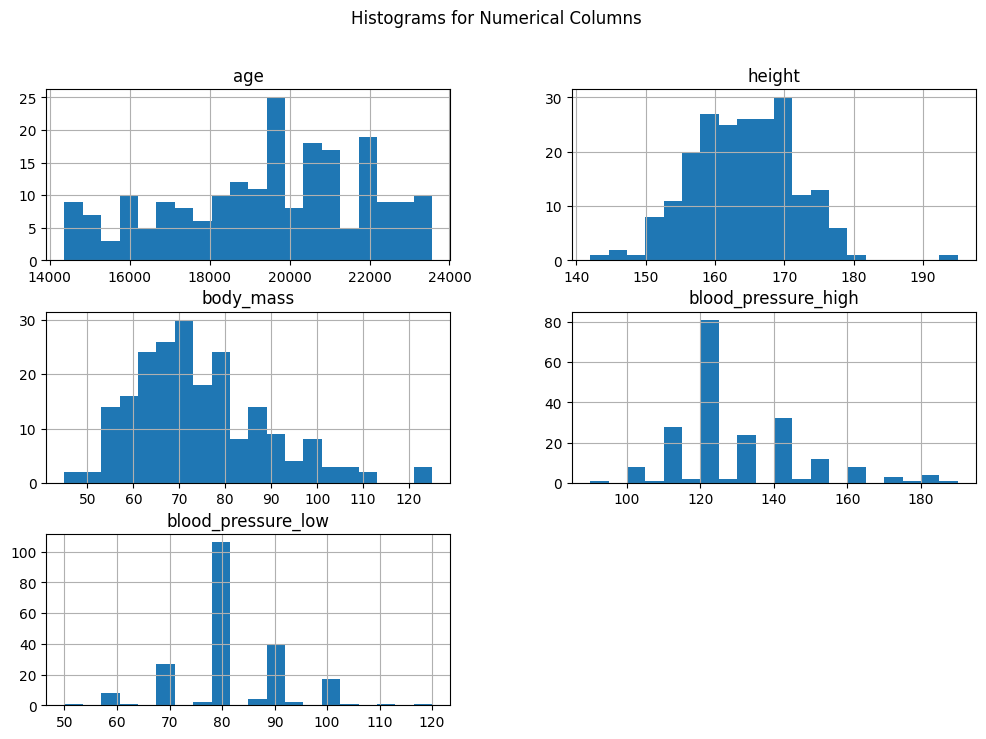

In [43]:
# --- Your code for 3 a) here --- #
# creating histogram of particular numerical features 
data[numeric_features].hist(figsize=(12, 8), bins=20)
plt.suptitle('Histograms for Numerical Columns')
plt.show()

_______
## 4. Plotting binary and categorical features

***4 a)*** Plot **barplots** for each of the non-numeric features. **Use fractions, not the real frequencies of the levels of these features**.

--------------

_tip: For plotting, see documentation on axes.bar. To get the fractions, see the value_counts function and its optional argument normalize._

_If you read in the dtypes to be pandas dtype.boolean, in some cases its easier to work with other packages, suchs as matplotlib when they are represented as numbers [0,1] and not True or False. If you get errors you can try to cast them momentarily to be int or float with astype. This does not mean that you've done the exercise incorrectly, just that you have to change them for the plotting package._

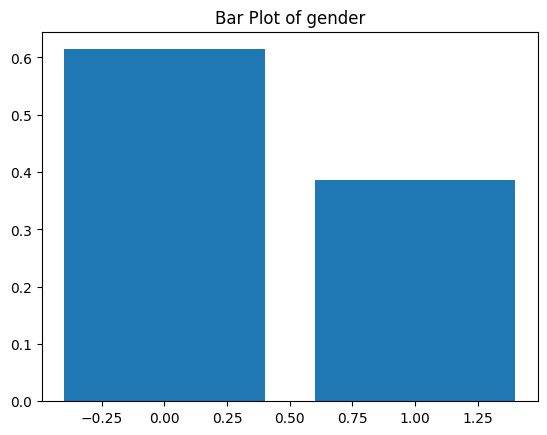

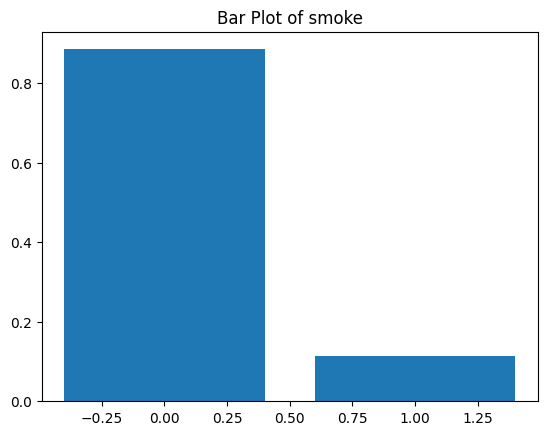

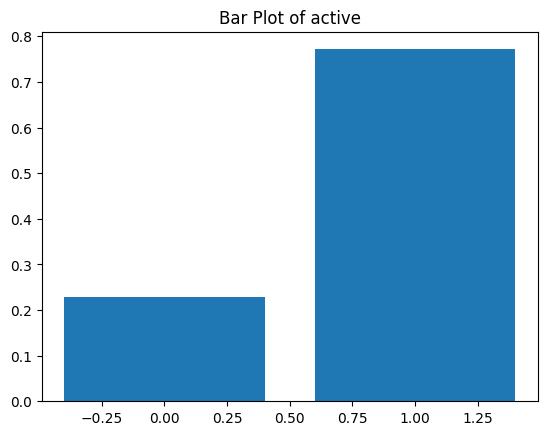

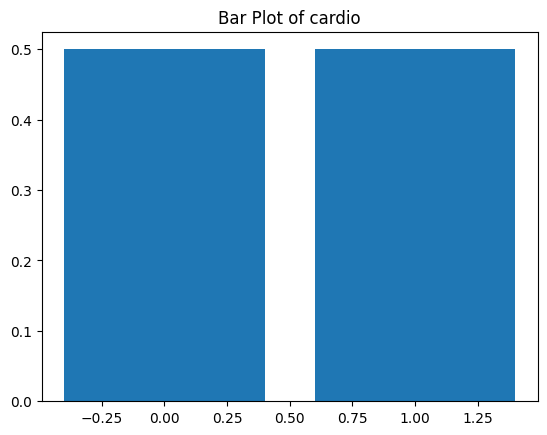

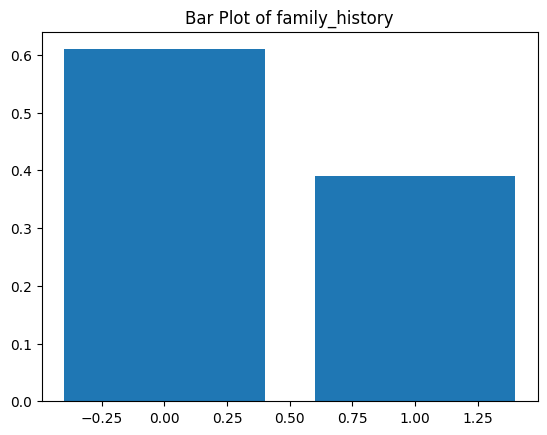

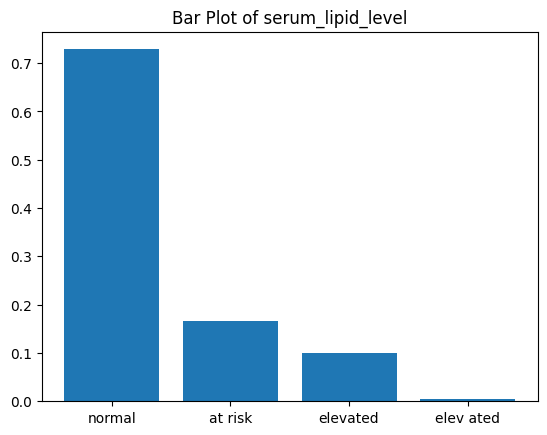

In [44]:
### Your code for 4 a) here ###
# Assuming 'data' is your DataFrame and 'non_numeric_features' is the list of non-numeric features
for i, feature in enumerate(nonNumeric_features):
    # Get the value counts for this feature, normalized to represent fractions
    # the object returned will contain the relative frequencies of the unique values (in other words, the fractions)
    value_counts = data[feature].value_counts(normalize=True)
    
    # If the feature is boolean, convert it to int for easier plotting
    if data[feature].dtype == 'boolean':
        value_counts.index = value_counts.index.astype(int)

    # Create a new figure for this feature
    plt.figure(i)

    # Create the bar plot
    plt.bar(value_counts.index, value_counts.values)

    # Set the title of the plot
    plt.title(f'Bar Plot of {feature}')

# Display the plots
plt.show()


**4 b)** Do you see something odd with one of the features? Fix it.

If you read the dtype of the categorical feature to be pandas dtype.categorical, **you have to also use the pandas function remove_categories to remove the category level from the feature**, even if you would have already removed the value. You can do this like: _data['feature_name'] = data['feature_name'].cat.remove_categories("category name to delete")_

<font color="green">Your answer for 4 b)</font>

Text(0.5, 0.98, 'Bar plot of non-numeric data')

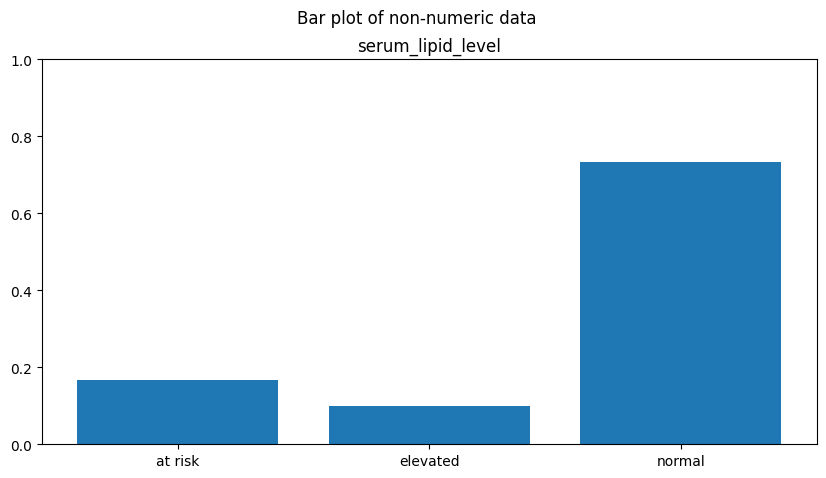

In [45]:
### Your code for 4 b) here ###
fig, axes = plt.subplots(figsize = (10,5)) 

#Remove "eleva ted" category and normalizing the value counts
data_copy = data.copy()
data_copy[feature] = data_copy[feature].cat.remove_categories("elev ated")
counts = data_copy[feature].value_counts(normalize=True).sort_index()

# Creation of a bar plot
axes.bar(counts.index.astype(str), counts.values)

# Setting the  title for the axes
axes.set_title(feature)

# Setting the y limit
axes.set_ylim((0,1))

# Setting Title for the bar plot
fig.suptitle("Bar plot of non-numeric data")



-------------

## 5. Feature generation and exploration

Feature Engineering is a crucial step in the process of preparing data for most data analysis projects. It involves creating new features or modifying existing ones to improve the performance of predictive models. Feature engineering is a combination of domain knowledge, creativity, and data analysis, and it can have a significant impact on the success of a data analysis project.

--------------

**BMI**, or **Body Mass Index**, is a simple numerical measure that is commonly used to assess an individual's body weight in relation to their height. In our use case, BMI can be a useful indicator in the prediction of cardiovascular problems, as it could provide a well-established link between obesity and an increased risk of developing the disease.

\begin{align*}
\text{BMI} & = \frac{\text{Body mass (kg)}}{(\text{height (m)})^2} \\
\end{align*}

---------------------------------------
***5 a)*** Generate a new feature based off of the provided formula, using 'height' and 'body_mass' and name it **BMI**

_tip: In the case of our dataset the height is in centimeters, so make sure to convert it into meters_

In [46]:
### Your code for 5 a) here ###
height = data_copy['height']
body_mass = data_copy['body_mass']

height_m = height / 100
#calculation of bmi
BMI = body_mass / (height_m ** 2)
data_copy['BMI'] = BMI
print(BMI)

0      21.218317
1      21.461937
2      24.158818
3      31.640368
4      33.910035
         ...    
205    22.031726
206    23.529412
207    31.644286
208    23.495237
209    26.365603
Length: 210, dtype: float64


***5 b)*** Using the previously calculated feature **BMI** generate a new feature named **BMI_category** that categorizes the values into groups, according to the standard BMI categories :

- Underweight: BMI less than 18.5
- Normal Weight: BMI between 18.5 and 24.9
- Overweight: BMI between 25 and 29.9
- Obese: BMI of 30 or greater

In [47]:
### Your code for 5 b) here ###
BMI_category = ["underWeight", "normalWeight", "overWeight", "Obese"]
BMI_ranges = [0, 18.5, 24.9, 30, float('inf')]
# including the category and printing the data
data_copy['BMI_category'] = pd.cut(data_copy['BMI'], bins=BMI_ranges, labels=BMI_category)
#Printing the data with BMI category is below.
data_copy


,age,gender,height,body_mass,blood_pressure_high,blood_pressure_low,smoke,active,cardio,serum_lipid_level,family_history,BMI,BMI_category
0,19797,False,161,55,102,68,False,True,False,elevated,False,21.218317,normalWeight
1,22571,True,178,68,120,70,False,False,False,normal,False,21.461937,normalWeight
2,16621,True,169,69,120,80,False,True,False,normal,False,24.158818,normalWeight
3,16688,False,156,77,120,80,False,True,False,normal,False,31.640368,Obese
4,19498,True,170,98,130,80,True,True,True,elevated,False,33.910035,Obese
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,16630,False,158,55,120,80,True,True,False,normal,False,22.031726,normalWeight
206,16742,False,170,68,110,70,False,True,False,normal,False,23.529412,normalWeight
207,23117,False,157,78,100,60,False,True,True,normal,False,31.644286,Obese
208,15236,False,153,55,120,80,False,True,False,normal,False,23.495237,normalWeight


Now that we have our BMI values, it's a good practice to see if we can spot a hidden trend in our data.

***5 c)*** Create a countplot to visualize the distribution of cardio (target variable)  within different BMI categories.

Number of people with normal BMI and cardiovascular disease: 27
Number of people with normal BMI and No cardiovascular disease: 52
Number of people with Obesed BMI and with cardiovascular disease: 38
Number of people with Obese BMI and No cardiovascular disease: 18


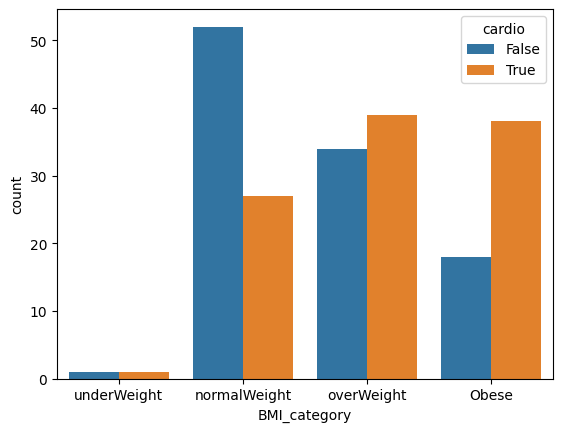

In [48]:
### Your code for 5 c) here ###

# Counting the number of patients with cardio (1) and normal BMI
num_normal_bmi_with_cardio = data_copy[(data_copy['cardio'] == 1) & (data_copy['BMI_category'] == 'normalWeight')].shape[0]

#Displaying the normal bmi people with the cardio result 
print("Number of people with normal BMI and cardiovascular disease:", num_normal_bmi_with_cardio)

# Counting the number of patients with no cardio (0) and normal BMI
num_normal_bmi_without_cardio = data_copy[(data_copy['cardio'] == 0) & (data_copy['BMI_category'] == 'normalWeight')].shape[0]

#Displaying the normal bmi people with the cardio result 
print("Number of people with normal BMI and No cardiovascular disease:", num_normal_bmi_without_cardio)

# Counting the number of patients with cardio (1) and Obesed BMI
num_obese_bmi_with_cardio = data_copy[(data_copy['cardio'] == 1) & (data_copy['BMI_category'] == 'Obese')].shape[0]

#Displaying the obesed bmi people with the cardio result 
print("Number of people with Obesed BMI and with cardiovascular disease:", num_obese_bmi_with_cardio)

# Counting the number of patients with no cardio (0) and obese BMI
num_obese_bmi_without_cardio = data_copy[(data_copy['cardio'] == 0) & (data_copy['BMI_category'] == 'Obese')].shape[0]

#Displaying the  bmi people with the cardio result 
print("Number of people with Obese BMI and No cardiovascular disease:", num_obese_bmi_without_cardio)

# Creating a countplot for different BMI
sns.countplot(x='BMI_category', hue='cardio', data=data_copy, order=['underWeight', 'normalWeight', 'overWeight', 'Obese'])

# Display the plot
plt.show()


***5 d)*** Can you notice any relationship or visible trend?

<font color="green">The underweight people are very less here so they seem to have less cardio but hard to say as the data is itself very less. Here the true means presence of cardio disease and false means no cardio.The Normal Weight people are more here and normal weight people also have cardio for 27 people and 52 Normal age people don't have cardio. Again when I check the Obesity count then 38 obesed people have cardio disease and Only 18 obesed people  don't have the cardio disease. So more BMI increases the Cardio here which can be seen from the data. Oberweight and Obesed people have the cardio disease.)</font>

Below, there is ready-made code for you to appropriatly add the newly created features to the right column type list. You don't need to change anything about the code, just make sure that the names of the added features are as specified earlier (**BMI** and **BMI_category**)

In [49]:
# ---- Add features to column type list (no need to change) --------
numeric_features.append("BMI")
data['BMI_category'] = data_copy['BMI_category'].astype('category')
categorical_features.append("BMI_category")

-------------

## 6. Preprocessing numeric features

Scaling the data improves the performance of machine learning algorithms in many cases, or perhaps better put, can ruin performance if not done. For instance with distance based algorithms covered in the course such as PCA, T-SNE and KNN some features with large values can dominate the distance calculations.

-----------
We will look at two often used ways of bringing the values to the same scale: **min-max scaling to [0,1]** and **standardizing the features to 0 mean and unit variance**. We will see, that the decision has implications on how the data will look afterwards. Standardizing values is very common in statistics and min-max scaling is for example used in training neural networks, where we want the range to match the range of an activation function in the network. Its good to know both.

Two functions, sklearn.minmax_scale and sklearn.scale have been imported for you and you can use them in the following exercises.
__________________________



**6 a)** Min-max numeric attributes to [0,1] and **store the results in a new dataframe called data_min_maxed**. You might have to wrap the data to a dataframe again using pd.DataFrame()

In [50]:
# --- Your code for 6 a) here --- #
data_min_maxed = pd.DataFrame(minmax_scale(data_copy[numeric_features]),
columns=numeric_features)
print(data_min_maxed)

          age    height  body_mass  blood_pressure_high  blood_pressure_low  \
0    0.590346  0.358491     0.1250                 0.12            0.257143   
1    0.891933  0.679245     0.2875                 0.30            0.285714   
2    0.245053  0.509434     0.3000                 0.30            0.428571   
3    0.252337  0.264151     0.4000                 0.30            0.428571   
4    0.557839  0.528302     0.6625                 0.40            0.428571   
..        ...       ...        ...                  ...                 ...   
205  0.246032  0.301887     0.1250                 0.30            0.428571   
206  0.258208  0.528302     0.2875                 0.20            0.285714   
207  0.951294  0.283019     0.4125                 0.10            0.142857   
208  0.094477  0.207547     0.1250                 0.30            0.428571   
209  0.399652  0.566038     0.4125                 0.50            0.571429   

          BMI  
0    0.094180  
1    0.101828  
2  

**6 b)** Standardize numeric attributes to 0 mean and unit variance and **store the results in a new dataframe called data_standardized**

In [51]:
# Your code for 6 b here --- #
#Initalization of  the StandardScaler which was imported from StandardScaler
scaler = StandardScaler()
# Standarization of  the specified columns to 0 mean and variance
# ANd creating the new data frame of the standarized data now
data_standardized = pd.DataFrame(scaler.fit_transform(data_copy[numeric_features]),columns=numeric_features)
print(data_standardized[numeric_features])

          age    height  body_mass  blood_pressure_high  blood_pressure_low  \
0    0.140926 -0.423185  -1.296193            -1.480325           -1.392016   
1    1.285684  1.838449  -0.404407            -0.449822           -1.190484   
2   -1.169727  0.641113  -0.335808            -0.449822           -0.182819   
3   -1.142077 -1.088372   0.212983            -0.449822           -0.182819   
4    0.017537  0.774151   1.653560             0.122679           -0.182819   
..        ...       ...        ...                  ...                 ...   
205 -1.166013 -0.822297  -1.296193            -0.449822           -0.182819   
206 -1.119793  0.774151  -0.404407            -1.022324           -1.190484   
207  1.511004 -0.955335   0.281582            -1.594825           -2.198148   
208 -1.741280 -1.487484  -1.296193            -0.449822           -0.182819   
209 -0.582904  1.040225   0.281582             0.695180            0.824845   

          BMI  
0   -1.156430  
1   -1.111208  
2  

**6 c)** Make two boxplots of the 'age' feature, one plot with the data_min_maxed and one with the data_standardized. Preferably put the plots side-by-side and give each titles. See the tutorial in the beginning for help.

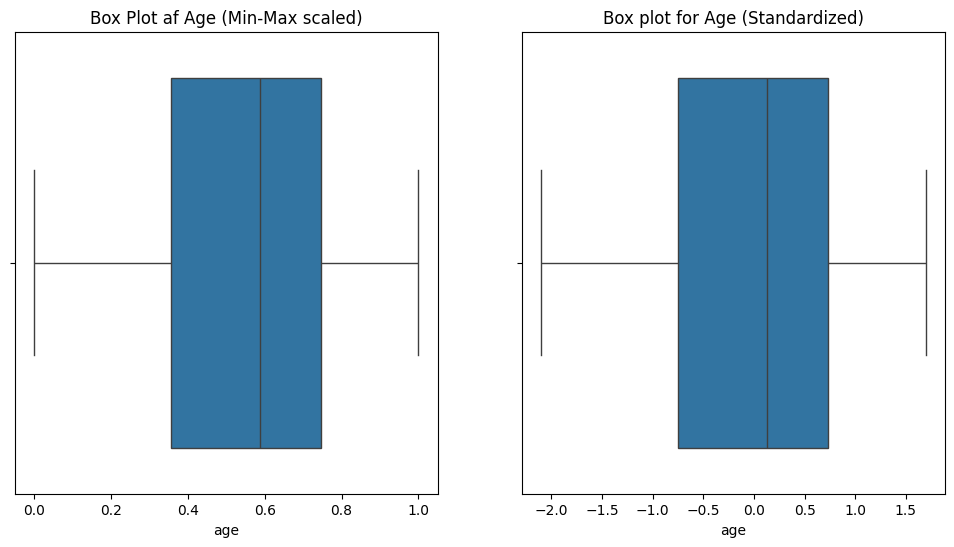

In [52]:
# Your code for 6 c) here --- #
# Box plot for min-max scaled data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='age', data=data_min_maxed)
plt.title('Box Plot af Age (Min-Max scaled)')

#plot for standardized datass
plt.subplot(1, 2, 2)
sns.boxplot(x='age', data=data_standardized)
plt.title('Box plot for Age (Standardized)')

plt.show()

**6 d)** Describe what you would expect to see in these two boxplots. How would the characteristics of the boxplots differ for min-max scaled data and standardized data?

_tip: Consider factors like the location of the mean, and the range of values presented._

<font color="green">mini max scale rescales the values of ages data between 0 to 1.While standardization transforms value mean to 0 and standard deviation to 1.Standardization changes both mean and standard deviation of values that affects distribution shape.Mimmax scale have mean of about 0.6 and values from 0 to 1 ranges whereas, standardization have mean of about 0 and value from -2 to 1.5)</font>

---------

Lets see the differences of these preprocessing methods through an example. We will add an "outlier" point (some point with a large value) to replace the
last value in both data, then again minmax and standardize and plot. The code to add the value is given for you and you shouldn't change it.

--------------------

***6e) Do the following:***
1. Take the data for the age feature (age_w_outlier) provided for you
2. Make two variables, age_w_outlier_minmaxed, containing the min-maxed values of the age_w_outlier and
3.  age_w_outlier_standardized containing the standardized values for the age_w_outlier


In [53]:
### Add an outlier, DONT CHANGE THIS CELL CODE, JUST RUN IT ###
data_w_outlier = data.copy() #data should be the name of the variable where you have stored your data!
data_w_outlier.loc[data.shape[0] -1 , 'age'] = 150 #change the last value of age to be 150
age_w_outlier = data_w_outlier.age

In [54]:
# --- Your code for 6 e) ---
#Taking the data for age feature

from sklearn.preprocessing import MinMaxScaler


age_w_outlier = data_w_outlier['age']
# creating a mimmax object
min_max_scaler = MinMaxScaler()

# Min max scale age_w_outlier values
age_w_outlier_minmaxed = min_max_scaler.fit_transform(np.array(age_w_outlier).reshape(-1, 1))

# Min-max scale for the age_w_outliner values.val
scaler = StandardScaler()

# Standardize the age_w_outliner values as shown below
age_w_outlier_standardized = scaler.fit_transform(age_w_outlier.values.reshape(-1, 1))

***Below there is pre-written code for you to plot the different cases. Run it. The code should run if you have named your features appropriately. Run the code.***

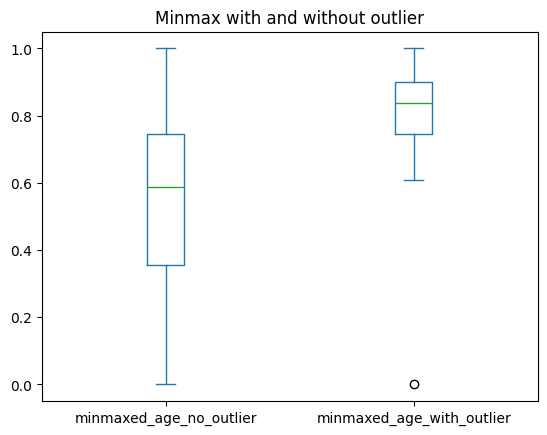

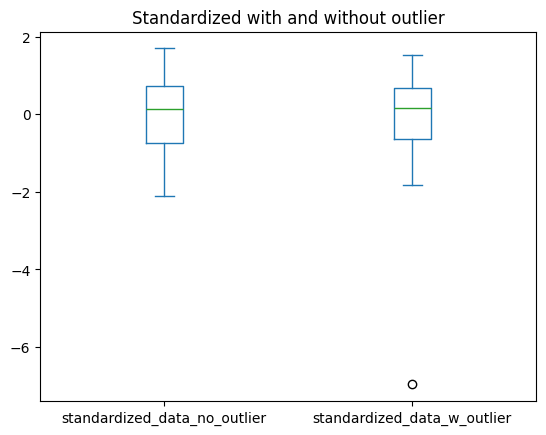

In [55]:
# Wrap in a dataframe that will have two features - the age feature without the outlier, and the age feature with it, min-maxed.
# I do like below because the code shows value error and dimensional errors so flatten resolves the problem here so
minmaxed_datas = pd.DataFrame({"minmaxed_age_no_outlier": data_min_maxed['age'],
 "minmaxed_age_with_outlier": age_w_outlier_minmaxed.flatten() })

# Wrap in a dataframe that will have two features - the age feature without the outlier, and the age feature with it, standardized.
standardized_datas = pd.DataFrame({"standardized_data_no_outlier": data_standardized['age'],
    "standardized_data_w_outlier": age_w_outlier_standardized.flatten() })

axes_minmaxed = minmaxed_datas[['minmaxed_age_no_outlier', 'minmaxed_age_with_outlier']].plot(kind='box', title='Minmax with and without outlier')
axes_std = standardized_datas[['standardized_data_no_outlier', 'standardized_data_w_outlier']].plot(kind='box', title='Standardized with and without outlier')

----------
**6 f) Look at the output of the above cell and answer the following**:

1. Can you notice a difference between the two cases (min-maxed and standardized)?
2. Can you say something about the difference of the effect of min-maxing and standardization?


<font color="green">1. In Min-Max scaling with outliner affects scaling because scaling[0, 1]is considered but Standardization is less sensitive to outliners because it transfers data to have mean value 0 and a standard deviation to 1. Without outliner min-max scaling scales value to range[0,1] so all data will fit in this range.                                                       2.  Minimax scales data in fixed range but standarization scales the data based on statistical distribution in general.The use of both methods depends upon the need of use of the methods.)</font>

---------------
## 7. Preprocessing categorical features



We can roughly divide categorical variables/features to two types:  ***nominal categorical***  and  ***ordinal categorical*** variables/features. Some cases are clear in terms of which of the two a feature falls into. For example nationality is not an ordered feature, but which grade in school someone is has a natural ordering. **One-hot encoding** was presented in the lectures and will be used in the following exercises with different learning methods.


-----
***Nominal categorical features need to be encoded***, because not encoding them implies that they have an order. For example, consider a dataset where you would have rows by different countries, encoded randomly with numbers, for ex. Finland = 1, Norway = 2 and so on. For some analyses and methods this would imply that Norway is somehow "greater" in value than Finland. For some algorithms, the implication would also be, that some of the countries would be "closer" to each other.

------
***Ordinal categorical features do not necessarily need to be encoded***, but there are cases where it can be wise. One case is that the categories are not even distance from each other, which is the case with the 'serum_lipid_level' feature with the levels 'normal', 'elevated' and 'at risk'. Its not clear that these are equal in distance from each other. When unsure, it may also be better to one-hot encode, and a lot of packages do it for you behind the scenes. Here we decide to one-hot encode.  

---------------------


***7 a)*** One-hot-encode the serum_lipid_level-feature and add the one-hot features to the data. Give the new features meaningful names. Print the first rows of the resulting dataframe.

_tip: pandas has a function for this, google!_

In [56]:
# --- Your code for 7 a) here ---
#performing one-hot encoding in the serum_lipid_level
one_hot_encoded = pd.get_dummies(data_copy['serum_lipid_level'], prefix='serum_lipid')
# concatenate the features with orginal data
data_encoded = pd.concat([data, one_hot_encoded], axis=1)
# dropping previous existed column now as no need now we have another
data_encoded = data_encoded.drop('serum_lipid_level', axis=1)

#printing the resulting data frame to check
print(data_encoded.head())

     age  gender  height  body_mass  blood_pressure_high  blood_pressure_low  \
0  19797   False     161         55                  102                  68   
1  22571    True     178         68                  120                  70   
2  16621    True     169         69                  120                  80   
3  16688   False     156         77                  120                  80   
4  19498    True     170         98                  130                  80   

   smoke  active  cardio  family_history  BMI_category  serum_lipid_at risk  \
0  False    True   False           False  normalWeight                False   
1  False   False   False           False  normalWeight                False   
2  False    True   False           False  normalWeight                False   
3  False    True   False           False         Obese                False   
4   True    True    True           False         Obese                False   

   serum_lipid_elevated  serum_lipid_normal 

----------

<div class="alert alert-block alert-warning">
    <h1><center> BONUS EXERCISES </center></h1>

- Below are the bonus exercises. You can stop here, and get the "pass" grade.
- By doing the bonus exercises below, you can get a "pass with honors", which means you will get one point bonus for the exam.

The following exercises are more challenging and not as straight-forward and may require some research of your own. However, perfect written answers are not required, but answers that show that you have tried to understand the problems and explain them with your own words.

____________
##  <font color = dollargreen > 8. BONUS: Dimensionality reduction and plotting with PCA </font>
In the lectures, PCA was introduced as a dimensionality reduction technique. Here we will use it to reduce the dimensionality of the numeric features of this dataset and use the resulting compressed view of the dataset to plot it. This means you have to, run PCA  and then project the data you used to fit the PCA to the new space, where the principal components are the axes.
____________

-------------
**8 a)** Do PCA with two components with and without z-score standardization **for the numeric features in the data**.

In [57]:
# --- Your for 8 a) code here --- #
# performing the pca with 2 components in data with standardization
pca1 = PCA(n_components=2)
pca_result1 = pca1.fit_transform(data_copy[numeric_features])

#creation of dataframe for pca
data_pca1 = pd.DataFrame(data=pca_result1, columns=['PC1','PC2'])

# With Z-score standardization we can do pca as below:
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_copy[numeric_features])

#performing pca with 2 components in data with standardization
pca2 = PCA(n_components=2)
pca_result2 = pca2.fit_transform(data_standardized)

# creating data frame for standardized results
data_pca2 = pd.DataFrame(data=pca_result2, columns=['PC1','PC2'])



-------------


**8 b) Plot the data, projected on to the PCA space as a scatterplot, the x-axis being one component and y the other. **Add the total explained variance to your plot as an annotation**. See the documentation of the pca method on how to get the explained variance.

- _Tip: It may be easier to try the seaborn scatterplot for this one. For help see documentation on how to do annotation (see tutorial). The total explained variance is the sum of both the components explained variance_.

- _Tip2_: Depending on how you approach annotating the plot, you might have to cast the feature name to be a string. One nice way to format values in python is the f - formatting string, which allows you to insert expressions inside strings (see example below):



------
name = Valtteri<br>
print(f"hello_{name}")

---------
You can also set the number of wanted decimals for floats<br>
For example f'{float_variable:.2f}' would result in 2 decimals making it to the string created

----------

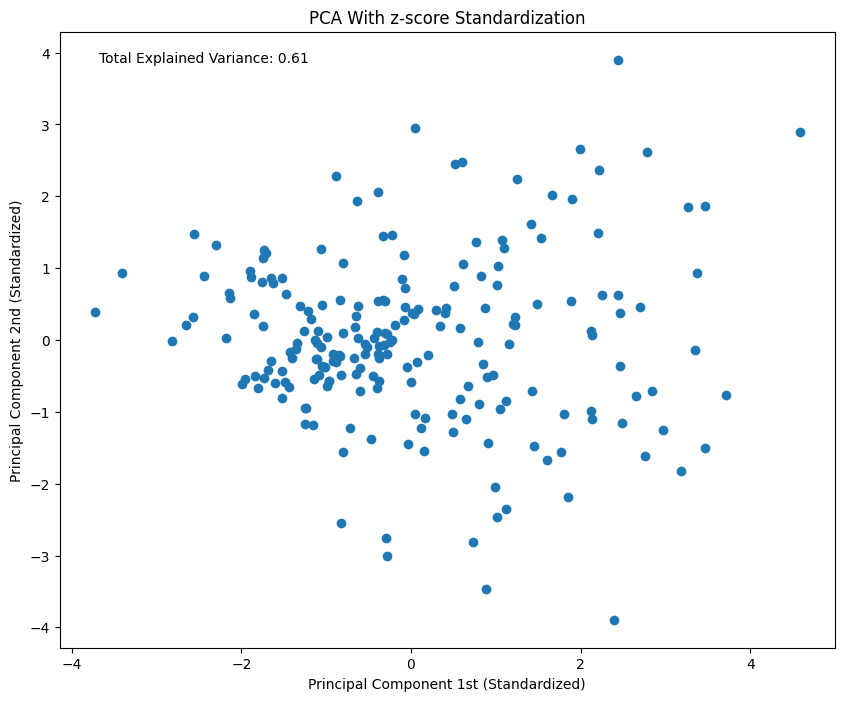

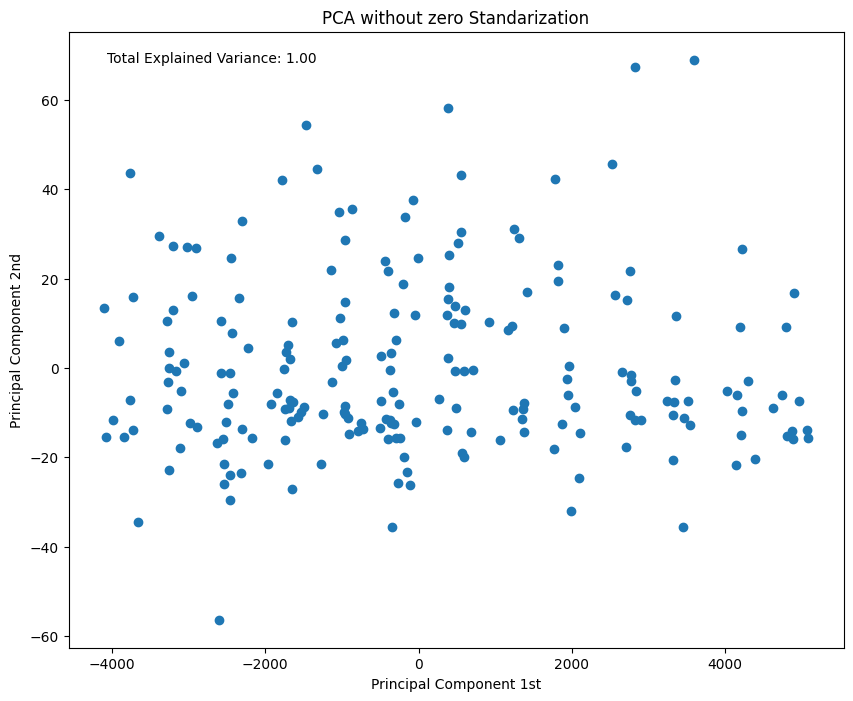

In [58]:
# --- Your code for 8 b) --- you can make more cells if you like ---

#plotting the data set with standaridized data
plt.figure(figsize=(10, 8))
plt.scatter(data_pca2['PC1'], data_pca2['PC2'])
plt.title('PCA With z-score Standardization')
plt.xlabel('Principal Component 1st (Standardized)')
plt.ylabel('Principal Component 2nd (Standardized)')
total_variance_standardized = np.sum(pca2.explained_variance_ratio_)
plt.annotate(f'Total Explained Variance: {total_variance_standardized:.2f}', xy=(0.05, 0.95), xycoords='axes fraction')
plt.show()

#plotting the data set without zero standardization
plt.figure(figsize=(10,8))
plt.scatter(data_pca1['PC1'],data_pca1['PC2'])
plt.title('PCA without zero Standarization')
plt.xlabel('Principal Component 1st')
plt.ylabel('Principal Component 2nd')
total_variance = np.sum(pca1.explained_variance_ratio_)
plt.annotate(f'Total Explained Variance: {total_variance:.2f}', xy=(0.05, 0.95), xycoords='axes fraction')
plt.show()




**8 c) Gather information for the next part of the exercise and print out the following things:**
- First, the standard deviation of the original data features (not standardized, and with the numeric features only).
- Second, the standard deviation of the standardized numeric features

In [59]:
# --- Your code for 8 c) here --- #
#standard deviation of origional data features is
original_data = ['age', 'height', 'body_mass', 'blood_pressure_high', 'blood_pressure_low']
print(data[original_data].head(), '\n')
print(f'Standard deviation of Origional Data\n: {data[original_data].std()}')
stdDev_standarized = data_standardized.std()
print(f'standardised data standard deviation \n:',stdDev_standarized)

     age  height  body_mass  blood_pressure_high  blood_pressure_low
0  19797     161         55                  102                  68
1  22571     178         68                  120                  70
2  16621     169         69                  120                  80
3  16688     156         77                  120                  80
4  19498     170         98                  130                  80 

Standard deviation of Origional Data
: age                    2429.010199
height                    7.534648
body_mass                14.612326
blood_pressure_high      17.508947
blood_pressure_low        9.947652
dtype: float64
standardised data standard deviation 
: 1.0


----------
**8 d) Look at the output above and the explained variance information you added as annotations to the plots. Try to think about the following questions and give a short answer of what you think has happened:**

1. Where do you think the difference between the amounts of explained variance might come from?

2. Can you say something about why it is important to scale the features for PCA by looking at the evidence youve gathered?

__Answer in your own words, here it is not important to get the perfect answer but to try to think and figure out what has happened__

------------

<font color="green">1. The standard Deviation of origional numerical features shows the spread of the values Origional form and there is no any transformation. In standarized the features are adjusted sp that they can have the consistent scale with values.
2. PCA is a technique which is used for reducing the dimension and feature extraction based on covariance matrix.visualization of data using selected principal component is achieved.Otliers can be identified through principal components.revels Correlation between variables.)</font>

------------------

## <font color = dollargreen > 9. Bonus: t-SNE and high dimensional data </font>

Another method that can be used to plot high-dimensional data introduced in the lectures was t-distributed Stochastic Neighbor Embedding (t-SNE).

***9 a)*** Run t-SNE for both standardized and non standardized data (as you did with PCA).

In [60]:
# --- Your code for 9 a) here --- #
# Running t-SNE for the non standarized data
#from sklearn.manifold import TSNE
# performing the t-SNE with 2 components in data without standardization
tsne1 = TSNE(n_components=2)
tsne_result1 = tsne1.fit_transform(data_copy[numeric_features])

#creation of dataframe for t-SNE
data_tsne1 = pd.DataFrame(data=tsne_result1, columns=['TSNE1','TSNE2'])
print(data_tsne1.head())

#performing t-SNE with 2 components in data with standardization
tsne2 = TSNE(n_components=2)
tsne_result2 = tsne2.fit_transform(data_standardized)

# creating the data frame for standardized results
data_tsne2 = pd.DataFrame(data=tsne_result2, columns=['TSNE1','TSNE2'])
print(data_tsne2.head())


       TSNE1     TSNE2
0  -0.706719 -0.255708
1 -18.892450  0.377682
2  16.133017  0.277598
3  15.878757  0.154822
4   0.907527  0.074920
      TSNE1      TSNE2
0  4.254627  11.673664
1  6.411007  -0.323306
2  5.795018   3.799795
3 -5.186255   6.362766
4  3.017860  -8.655324


***9 b)*** Plot t-sne, similarly to PCA making the color of the points correspond to the levels of the cardio feature, but having only numerical features as a basis of the T-SNE.  

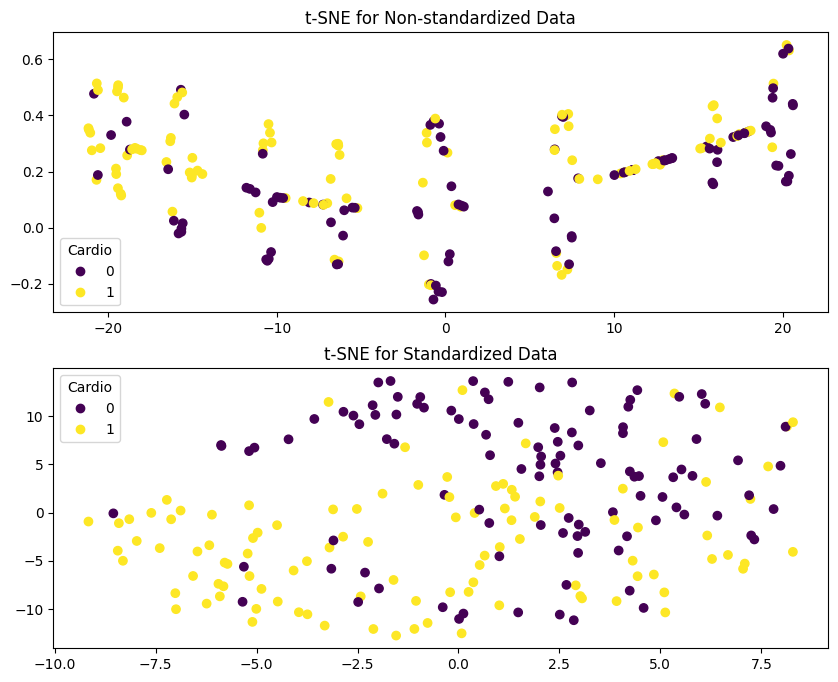

In [61]:

# --- Code for 9 b) --- #
# Plotting TSNE fot  standarized  data  now

           
data_tsne1['cardio'] = data['cardio']
data_tsne2['cardio'] = data['cardio']

# Create plots
fig = plt.figure(figsize=(10, 8))

# For Non-standardized data plot

plt.subplot(2, 1, 1) 
scatter = plt.scatter(data_tsne1['TSNE1'], data_tsne1['TSNE2'], c=data_tsne1['cardio'])
plt.title('t-SNE for Non-standardized Data')
plt.legend(*scatter.legend_elements(), title="Cardio")

# For Standardized data plot
plt.subplot(2, 1, 2) 
scatter = plt.scatter(data_tsne2['TSNE1'], data_tsne2['TSNE2'], c=data_tsne2['cardio'])
plt.title('t-SNE for Standardized Data')
plt.legend(*scatter.legend_elements(), title="Cardio")

plt.show()



***9 c)***

- What do you think might have happened between the two runs of t-SNE on unstandardized and standardized data? Why is it important to standardize before using the algorithm?

_Here the aim is to think about this and learn, not come up with a perfect explanation. Googling is encouraged. Think about whether t-sne is a distance based algorithm or not?_

<font color="green"></font>Standarization is crucial step in machine learning process.It is normalization technique to ensure that all features have same scale.
Relation and distribution between the data points in unstandardized data is difficult and it can't show the clear difference also.After standardization it looks better.
t-SNE helps in pattern recognition ,preprocessing, data exploration before applying Machine Learning algorithms for stable and better results.It is important that t-SNE operates on distances between points.The main goal of t-SNE is to convert the multi-dimensional dataset to  lower-dimensional dataset also.